# 주요 자연어 처리 모델 변화
```
Bag of words
    ↓
Words Embeddings
    ↓
RNN based models
    ↓
LSTM based models
    ↓
Bi-directional LSTM
    ↓
Attention based
    ↓
Transformers
```

# 트랜스포머(Transformer)
- 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델
- 딥러닝, 특히 자연어 분야의 모델링을 RNN에서 Self Attention 기반으로 전환시킨 혁신의 기점
- 순환신경망을 제외하고 Attention mechanism 만을 사용하여 인코더와 디코더 구조로 구현된 모델
- 인코더와 디코더 내에서 attention mechanism 적용(self attention)
- 인코더와 디코더 사이에서 attention mechanism 적용


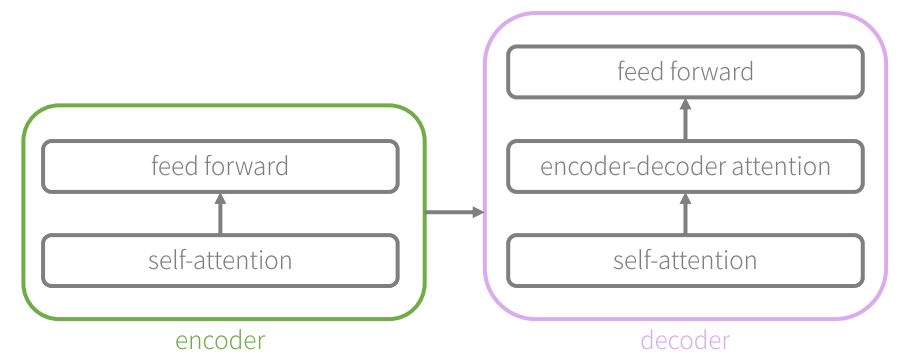

## Transformer의 Attention
- 트랜스포머에서는 총 3가지의 어텐션이 사용
- 셀프 어텐션은 Query, Key, Value가 동일한 문장에서 이루어지는 경우를 말함


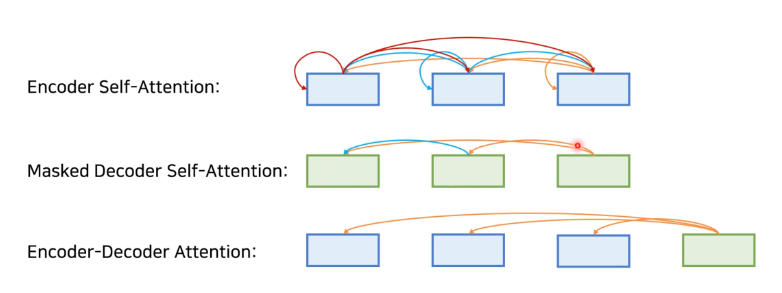

## Transformer 구조 개요



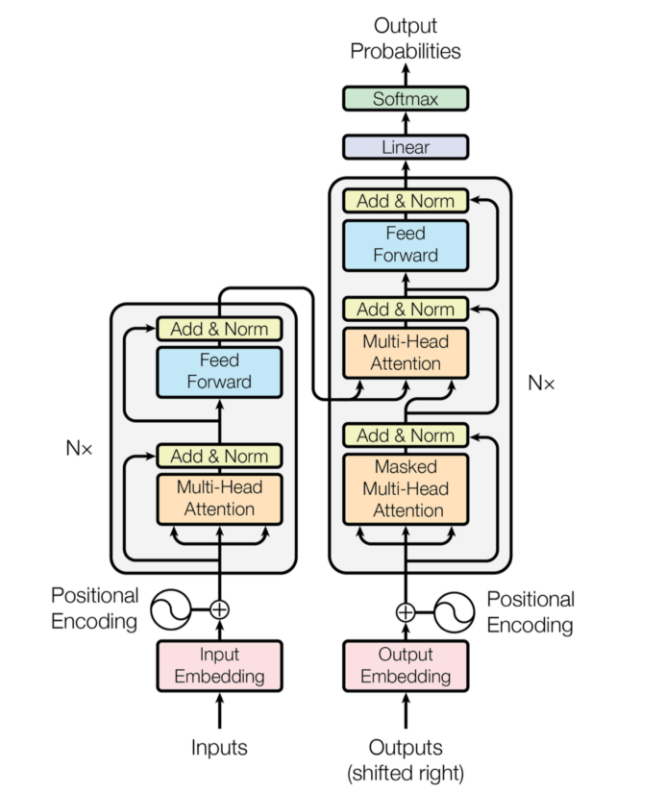

## 트랜스포머 주요 파라미터
- d_model
    - 트랜스포머의 인코더와 디코더에서의 입력과 출력의 크기를 의미
    - 임베딩 벡터의 차원수와 동일
    - 기본값: 512
- nhead
    - 멀티헤드 어텐션에서 사용하는 헤드의 수
    - 기본값: 8
    - d_model / nhead는 0이어야 함
- num_encoder_layers, num_decoder_layers
    - 트랜스포머에서 인코더와 디코더를 하나의 layer로 생각했을 때 몇개의 layer로 구성할 지에 대한 수
    - 기본값: 6
- dim_feedforward
    - 피드포워드 신경망(Feed-Forward Network)의 중간 레이어 차원
    - 기본값: 2048
    - 인코더와 디코더의 피드 포워드의 최종 출력 노드 개수는 d_model 과 같음
    - 일반적으로 d_model보다 크고, 4 * d_model 로 설정하는 경우가 많음

## 위치 인코딩(Positional encoding)

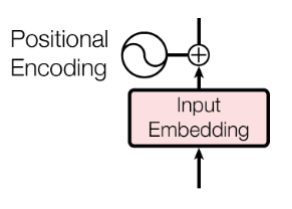

- 트랜스포머 모형은 순서를 다루는 구조가 없음
- 문장에서 단어의 위치를 인코딩하여 단어 임베딩에 더해줌
- 정현파를 이용하여 위치를 인코딩
    - 정현파: sin 함수 또는 cos 함수의 파형

$$
PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}})
$$

$$
PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}})
$$

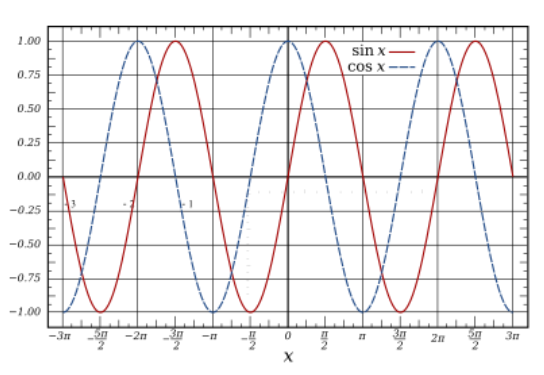

## Self Attention
- Q, K, V가 모두 같은 시퀀스로 자기 시퀀스를 참조하여 Attention 하는 기법
- 하나의 입력값을 Query, Key, Value 세 가지 값으로 변환하여 셀프 어텐션을 수행
- 다음의 순서로 연산
    1. 각 단어 임베딩 x에 Q, K, V 각각의 가중치를 곱한다.
    2. Query와 Key 사이의 유사도를 구하고 softmax로 스코어화 한다.
    3. 구해진 스코어를 Value와 가중합하여 Attention이 적용된 context vector를 만든다
- 자기 자신에게 어텐션을 수행한다는 의미
- 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구함
- Self Attention의 Query, Key, Value
    - Q : 입력 문장의 모든 단어 벡터들
    - K : 입력 문장의 모든 단어 벡터들
    - V : 입력 문장의 모든 단어 벡터들


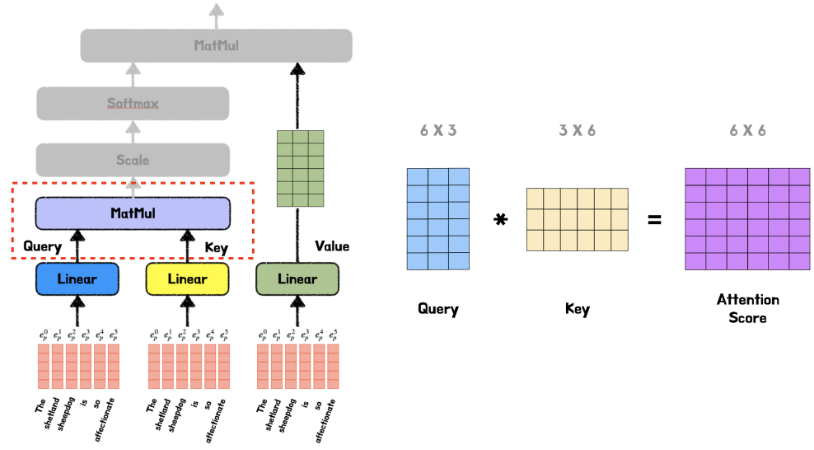

## Scaled Dot-Product Attention
- Dot-Product Attention에서 스케일링을 추가
- 스코어가 너무 커지지 않도록 쿼리와 키의 차원수에 루트를 씌운 수로 나눠줌

$$
score(Q, K)=QK^{T}/ \sqrt{d_k}
$$



## Multi-Headed Attention

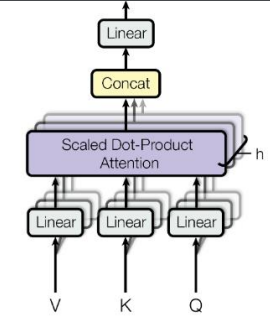

- Q, K, V를 여러 가지로 변환하여 주의 메커니즘 적용
- 원래 임베딩보다 작은 크기로 분할하여 어텐션을 수행한 다음 후에 결합하는 방식
- nhead 개수 만큼 Q, K, V 가중치 행렬을 만들어 행렬곱하여 나온 Q, K, V 를 이용하여 어텐션을 수행
- 예시로 하나의 단어에 대해 Q, K, V를 얻는다고 했을 때 d_model이 4이고, nhead가 2 라면 4x2 가중치 행렬을 곱하여 2차원 벡터의 Q, K, V를 생성
- head
    - 한개의 head는 한 가지 Q, K, V의 결과
    
- 문장에서 여러 가지 방식으로 여러 위치에 어텐션을 수행

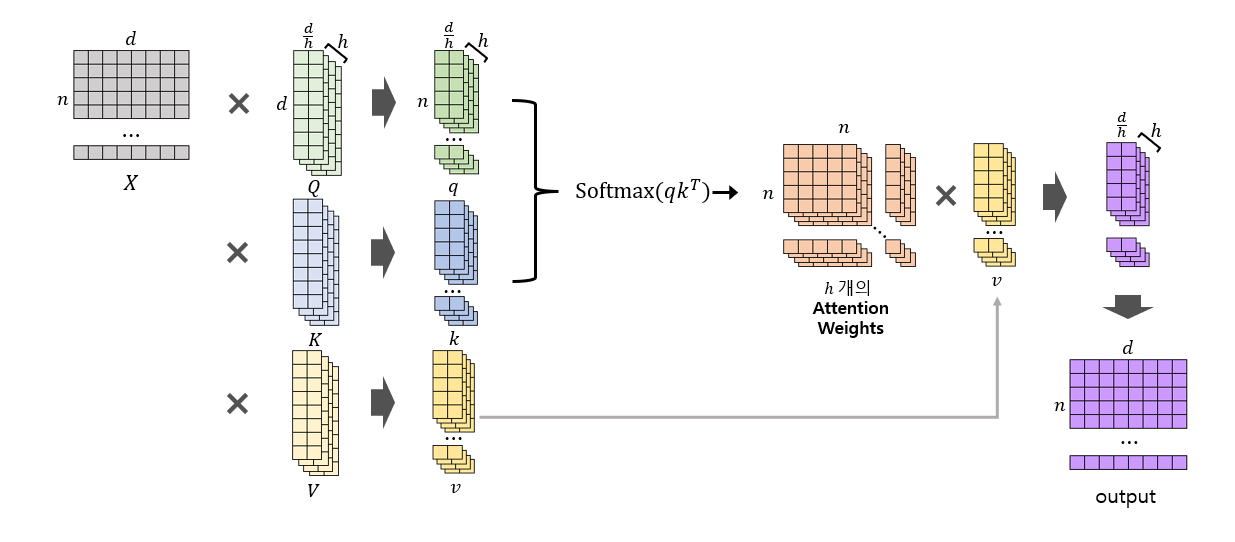

## Feed Forward
- FC-layer - Relu - FC-layer 연산

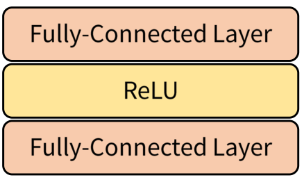

## Decoder Blocks
- 세부적인 구성 요소는 인코더와 크게 다르지 않으나 디코더의 역할에 맞는 구조 추가
- 디코더에 Masked Multi-Head Attention 적용
    - 추론 과정에서 미래 참조의 문제를 방지하기 위한 구조
- 인코더로부터 전달된 정보를 반영하기 위해 인코더에서 출력된 Context Vector와 디코더 사이에서 Attention을 수행
    - Query: 디코더 벡터 (Masked Multi-Head Attention 파트의 출력)
    - Key: Context Vector (인코더 출력)
    - Value: Context Vector (인코더 출력)




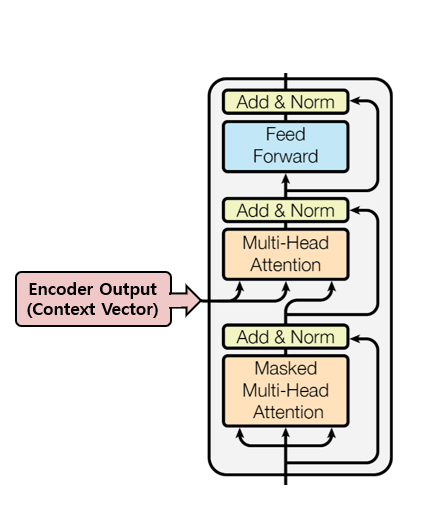

## Masked Multi-Head Attention
- 디코더 어텐션 연산에서 미래 참조 문제를 해결
- Query가 매칭되는 Key를 반영할 때 과거의 값만 참조하게 만드는 방법


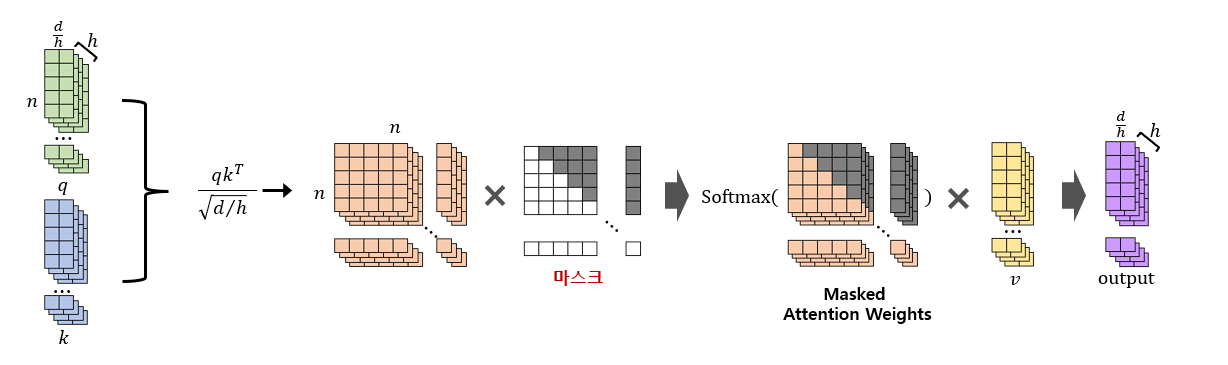

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = "../data/"
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
class Vocab:
    def __init__(self, tokens_list, specials = [], unk_token = None):
        self.id2token = set()
        for tokens in tokens_list:
            self.id2token.update(tokens)
        self.id2token = specials + sorted(list(self.id2token))
        self.token2id = { t:i for i, t in enumerate(self.id2token)  }
        self.unk_token = unk_token

    def __len__(self):
        return len(self.id2token)

    def __call__(self, tokens):
        return [
            self.token2id[t] if self.token2id.get(t) is not None else self.token2id[self.unk_token]
            for t in tokens
        ]

In [47]:
train = pd.read_csv(f"{DATA_PATH}translate_en_ko.csv")
train.shape

(5794, 2)

In [48]:
train["ko"] = train["ko"].str.replace("[^가-힣0-9 .,!?]", "", regex=True)

In [49]:
train["en"] = train["en"].str.replace("[^a-zA-Z0-9 .,!?]", "", regex=True)

# 한글 토큰화

In [50]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [51]:
src_data = []
for tokens in kiwi.tokenize(train["ko"]):
    tokens = [ t.form for t in tokens ]
    src_data.append(tokens)

# 어휘집 객체 생성

In [52]:
vocab_ko = Vocab(src_data, ["<pad>", "<unk>"], "<unk>")
len(vocab_ko)

3251

# 단어 번호 부여

In [53]:
src_data = [ vocab_ko(tokens) for tokens in src_data ]

# 영어 전처리

In [54]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [55]:
from nltk.tokenize import word_tokenize

sos_token = "<sos>"
eos_token = "<eos>"
trg_data = []
for text in train["en"]:
    tokens = [sos_token] + word_tokenize(text) + [eos_token]
    trg_data.append(tokens)

In [56]:
vocab_en = Vocab(trg_data, ["<pad>", "<unk>"], "<unk>")
len(vocab_en)

3524

In [57]:
trg_data = [ vocab_en(tokens) for tokens in trg_data ]

In [58]:
class TranslationDataset(torch.utils.data.Dataset):
    def __init__(self, src, trg):
        self.src, self.trg = src, trg
    def __len__(self):
        return len(self.src)
    def __getitem__(self, idx):
        return {
            "src" : torch.tensor(self.src[idx]),
            "trg" : torch.tensor(self.trg[idx]),
        }

In [59]:
def collate_fn(batch_data):
    src, trg = [], []
    for data in batch_data:
        src.append(data["src"])
        trg.append(data["trg"])
    src = torch.nn.utils.rnn.pad_sequence(src, batch_first=True)
    trg = torch.nn.utils.rnn.pad_sequence(trg, batch_first=True)
    return {"src": src, "trg": trg}

In [60]:
dataset = TranslationDataset(src_data, trg_data)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, collate_fn=collate_fn)
batch = next(iter(dataloader))
batch

{'src': tensor([[2281, 2572,  889, 2238,  143, 2238, 3054, 2281,  701,    4],
         [1202, 2281, 2850,  854, 1997,  701,    4,    0,    0,    0]]),
 'trg': tensor([[  33,  531, 2553,  741, 2328, 3159, 2749, 2582,    4,   32],
         [  33,  527, 2167, 3378,  995,    4,   32,    0,    0,    0]])}

# torch.nn.Transformer 클래스
- 인코더, 디코더 포함
    - Positional Encoding과 Embedding layer는 x
- 주요 파라미터
    - d_model: 인코더, 디코더의 입력과 출력의 feature 차원 크기
        - 임베딩 벡터 크기와 같음
        - 기본값: 512
    - nhead: 멀티 헤드 어텐션에서의 헤드 수(기본값: 8)
    - num_encoder_layers: 인코더 레이어 수(기본값: 6)
    - num_decoder_layers: 디코더 레이어 수(기본값: 6)
    - dim_feedforward: 피드포워드 신경망의 노드수(기본값: 2048)
    - batch_first: 배치 차원을 맨 앞으로 둘 것인지의 여부(기본값: False)

In [61]:
transformer = torch.nn.Transformer(batch_first=True)

- forward 메서드 주요 파라미터
    - src: 인코더에 전달할 입력 텐서(batch, seq, feature)
    - tgt: 디코더에 전달할 입력 텐서(batch, seq, feature)
    - tgt_mask: 디코더에 전달할 마스크 행렬

In [62]:
src_emb_layer = torch.nn.Embedding(len(vocab_ko), 512)
trg_emb_layer = torch.nn.Embedding(len(vocab_en), 512)

In [63]:
src, trg = src_emb_layer(batch["src"]), trg_emb_layer(batch["trg"])
src.shape, trg.shape # batch, seq, feature

(torch.Size([2, 10, 512]), torch.Size([2, 10, 512]))

In [64]:
tgt_mask = torch.nn.Transformer.generate_square_subsequent_mask(trg.shape[1])
tgt_mask

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [65]:
outputs = transformer(src, trg, tgt_mask)
outputs.shape # batch, seq, feature

torch.Size([2, 10, 512])

$$
PE_{(pos,\ 2i)}=sin(pos/10000^{2i/d_{model}})
$$

$$
PE_{(pos,\ 2i+1)}=cos(pos/10000^{2i/d_{model}})
$$

In [66]:
class PositionalEncoding(torch.nn.Module):
    def __init__(self, max_len, d_model):
        super().__init__()

        pos_encoding = torch.zeros(max_len, d_model) # seq, feature
        pos = torch.arange(max_len, dtype=torch.float32).view(-1, 1) # seq, 1
        _2i = torch.arange(0, d_model, step=2, dtype=torch.float32)

        tmp = pos / 10000 ** (_2i / d_model)
        pos_encoding[:, 0::2] = torch.sin(tmp)
        pos_encoding[:, 1::2] = torch.cos(tmp)
        pos_encoding = pos_encoding.unsqueeze(0) # batch(1), seq, feature

        self.register_buffer("pos_encoding", pos_encoding)

    def forward(self, x): # 임베딩 텐서 전달(batch, seq, feature)
        return x + self.pos_encoding[:, :x.shape[1]]

In [67]:
pe = PositionalEncoding(100, 512)
pe(src).shape

torch.Size([2, 10, 512])

# Seq2Seq 모델

In [68]:
class Net(torch.nn.Module):
    def __init__(
            self,
            src_vocab_size,
            trg_vocab_size,
            max_len=1000,
            d_model=512,
            nhead=8,
            num_encoder_layers=6,
            num_decoder_layers=6,
            dim_feedforward=2048
        ):
        super().__init__()

        self.src_emb = torch.nn.Embedding(src_vocab_size, d_model)
        self.trg_emb = torch.nn.Embedding(trg_vocab_size, d_model)
        self.pe = PositionalEncoding(max_len, d_model)

        self.transformer = torch.nn.Transformer(
            d_model,
            nhead,
            num_encoder_layers,
            num_decoder_layers,
            dim_feedforward,
            batch_first=True
        ) # batch, seq, feature

        self.output_layer = torch.nn.Linear(d_model, trg_vocab_size) # batch, seq, 단어 클래스의 예측값들

    def forward(self, src, trg, tgt_mask):
        src = self.pe(self.src_emb(src)) # batch, seq, feature(d_model)
        trg = self.pe(self.trg_emb(trg)) # batch, seq, feature(d_model)
        x = self.transformer(src, trg, tgt_mask=tgt_mask) # batch, seq, feature(d_model)
        return self.output_layer(x) # batch, seq, 단어 클래스의 예측값들

    def encoder(self, src):
        src = self.pe(self.src_emb(src)) # batch, seq, feature(d_model)
        return self.transformer.encoder(src) # batch, seq, feature(d_model)

    def decoder(self, trg, memory):
        trg = self.pe(self.trg_emb(trg)) # batch, seq, feature(d_model)
        x = self.transformer.decoder(trg, memory=memory) # batch, seq, feature(d_model)
        return self.output_layer(x) # batch, seq, 단어 클래스의 예측값들

In [69]:
model = Net(len(vocab_ko), len(vocab_en))
pred = model(batch["src"], batch["trg"], tgt_mask)
pred.shape

torch.Size([2, 10, 3524])

In [70]:
memory = model.encoder(batch["src"][:1])
memory.shape

torch.Size([1, 10, 512])

In [71]:
model.decoder(batch["trg"][:1, :1], memory).shape

torch.Size([1, 1, 3524])

# 학습 루프

In [72]:
def train_loop(dataloader, model, loss_function, optimizer, device):
    epoch_loss = 0
    model.train()

    for batch in dataloader:
        src, trg = batch["src"].to(device), batch["trg"].to(device)
        tgt_mask = torch.nn.Transformer.generate_square_subsequent_mask(trg.shape[1]).to(device)
        pred = model(src, trg, tgt_mask) # batch, seq, 단어 클래스 예측값

        n_class = pred.shape[-1]
        pred = pred[:, :-1].reshape(-1, n_class) # batch * seq, 단어 클래스 예측값

        trg = trg[:, 1:].flatten() # batch * seq

        mask = trg > 1
        trg = trg[mask]
        pred = pred[mask]

        loss = loss_function(pred, trg)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

In [76]:
params = {
    "num_encoder_layers": 1,
    "num_decoder_layers": 1
}

In [77]:
reset_seeds(SEED)

loss_function = torch.nn.CrossEntropyLoss()
model = Net(len(vocab_ko), len(vocab_en), **params).to(device)
optimizer = torch.optim.Adam(model.parameters())
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)

for epoch in range(50):
    loss = train_loop(dataloader, model, loss_function, optimizer, device)
    print(epoch, loss)

0 4.545521615625738
1 3.425451936302604
2 2.7836178894881365
3 2.249047516466497
4 1.8130263496231247
5 1.4518078984795035
6 1.1401152931726897
7 0.9268459913494823
8 0.7551731493446853
9 0.6273198831867386
10 0.5170256289151999
11 0.4474022761806027
12 0.3970155925541134
13 0.3488099982777795
14 0.325078682585077
15 0.29951820186861267
16 0.26777657047732845
17 0.25337777180331095
18 0.2356629538667071
19 0.21632500860717271
20 0.2188062147124783
21 0.21835480540335833
22 0.22045931744051503
23 0.2166286879679659
24 0.22264178563932796
25 0.20849240571260452
26 0.2195250942156865
27 0.20621503087190482
28 0.20830029478439918
29 0.1977957117033529
30 0.1974097239774662
31 0.1943790600686283
32 0.19251094955009418
33 0.1831029290845106
34 0.18186802114104175
35 0.16421891978153816
36 0.16571506677748082
37 0.16753819453847277
38 0.16470313637138723
39 0.1755364893393202
40 0.16206307537280595
41 0.16678150325686067
42 0.17161284730984613
43 0.16909970875297273
44 0.1515989912735237
45 0

In [78]:
trg_max_len = max(len(x) for x in trg_data)
trg_max_len

112

In [79]:
vocab_en(["<sos>", "<eos>"])

[33, 32]

In [80]:
@torch.no_grad()
def translate(text, model, vocab_src, vocab_trg, trg_max_len, device):
    model.eval()
    kiwi = Kiwi()
    tokens = [t.form for t in kiwi.tokenize(text)] # 토큰화
    src = vocab_src(tokens) # 단어 번호 부여
    src = torch.tensor(src).view(1, -1).to(device) # 배치 차원 추가

    trg = [33] # <sos> 토큰
    trg = torch.tensor(trg).view(1, -1).to(device) # 배치 차원 추가

    memory = model.encoder(src)

    result = []
    for _ in range(trg_max_len):
        pred = model.decoder(trg, memory)

        word_no = pred[0, -1].argmax().item()
        if word_no == 32:
            break

        result.append(vocab_trg.id2token[word_no])

        next_trg = torch.tensor([word_no]).view(1, -1).to(device)
        trg = torch.cat([trg, next_trg], dim=1)

    return " ".join(result)

In [91]:
text = "안녕"
text

'안녕'

In [92]:
translate(text, model, vocab_ko, vocab_en, trg_max_len, device)

'Hello .'